# Analyzing Used Cars Pricing Data

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Importing the Dataset</a></li>
    <li><a href="#Data_Wrangling">Data Wrangling</a>
        <ol>
            <li><a href="#Identify_missing_values">Identify missing values</a></li>
            <li><a href="#Deal_with_missing_data">Deal with missing values</a></li>
            <li><a href="#Correcting_data_format">Correct data format</a></li>
            <li><a href="#Data_Standardization">Data Standardization</a></li>
            <li><a href="#Data_Normalization">Data Normalization</a></li>
            <li><a href="#Binning">Binning</a></li>
            <li><a href="#Indicator_Variables">Indicator Variables</a></li>
        </ol>
    </li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns Using Visualization</a>
        <ol>
            <li><a href="#Continuous_Numerical_Variables">Continuous Numerical Variables</a></li>
            <li><a href="#Categorical_Variables">Categorical Variables</a></li>
        </ol>
    </li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#grouping">grouping</a></li>
    <li><a href="#correlation">Correlation</a></li>
    <li><a href="#Conclusionf">Conclusion: Important Variables</a></li>
    <li><a href="#CRegression">Regression Models</a>
    <ol>
        <li><a href="#mlr">Multiple Linear Regression</a></li>
        <li><a href="#CPolyRegg">Polynomial Regression Using Pipelines</a></li>
        <li><a href="#Measures">Measures for In-Sample Evaluation</a></li>
        <li><a href="#Decision">Decision Making: Determining a Good Model Fit</a></li>
        </ol>
    </li>
    <li><a href="#Conclusionff">Conclusion: Important Variables</a></li>
    
</ol>
</div>

<h2 id="import_data">1. Importing the Dataset</h2>

In [2]:
# import pandas library
import pandas as pd
import numpy as np

In [3]:
filepath = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(filepath, header=None)

In [4]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Add Headers</h3>
<p>
Take a look at the data set. Pandas automatically set the header with an integer starting from 0.
</p>
<p>
To better describe the data, we can introduce a header. This information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>
<p>
Thus, we have to add headers manually.
</p>


In [5]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


 Replace headers and recheck our data frame:


In [6]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis. 

### Basic Insights from the Data set
<p>
After reading data into Pandas dataframe, it is time to explore the data set.
</p>


#### Data Shape

In [7]:
df.shape

(205, 26)

<h4>Data Types</h4>


In [8]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see there is a mix of numerical and catigotical features and the target variable is an object even thought it's a numarical variable.

<h2 id="Data_Wrangling">2. Data Wrangling</h2>

<h3 id="Identify_missing_values">2.1 Identify missing values</h3>
<h4>Convert "?" to NaN</h4>



In [9]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Evaluating for Missing Data</h3>


In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>


In [11]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h3 id="Deal_with_missing_data">2.2 Deal with missing data</h3>

We are going to apply 3 different methods as explained below:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [13]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)


<h4>Calculate the mean value for the "bore" column</h4>


In [14]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [15]:
df["bore"]=df["bore"].replace(np.nan, avg_bore)

#### Calculate the mean vaule for "stroke" column


In [16]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


#### replace NaN by mean value in "stroke" column

In [17]:
df["stroke"]=df["stroke"].replace(np.nan, avg_stroke)

<h4>Calculate the mean value for the "horsepower" column</h4>


In [18]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [19]:
df['horsepower']=df['horsepower'].replace(np.nan, avg_horsepower)

<h4>Calculate the mean value for "peak-rpm" column</h4>


In [20]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [21]:
df['peak-rpm']=df['peak-rpm'].replace(np.nan, avg_peakrpm)

#### Identify the most common type in the "num-of-doors" column 

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [22]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [23]:
df['num-of-doors'].value_counts().idxmax()

'four'

#### Replace "NaN" with the most common type in the "num-of-doors" column 

In [24]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"]=df["num-of-doors"].replace(np.nan, "four")

Finally, drop all rows that do not have price data:


In [25]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, we have a data set with no missing values.


<h3 id="Correcting_data_format">2.3 Correcting data format</h3>

<h4>Let's list the data types for each column</h4>


In [27]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types 


<h4>Convert data types to proper format</h4>


In [28]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Let us list the columns after the conversion</h4>


In [29]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h3 id="Data_Standardization">2.4 Data Standardization</h3>

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


### Convert mpg to L/100km

In [31]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0


In [32]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


<h3 id="Data_Normalization">2.5 Data Normalization</h3>


In [33]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3 id="Binning">2.6 Binning</h3>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>


 Convert data to correct format:


In [34]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Plot the histogram of horsepower to see the distribution of horsepower.


Text(0.5, 1.0, 'horsepower bins')

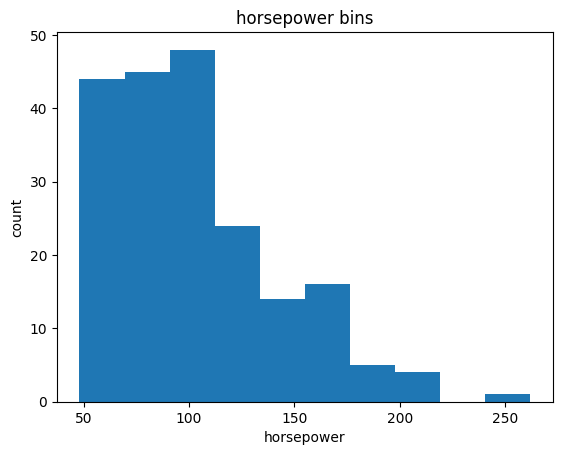

In [35]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [36]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Set group  names:


In [37]:
group_names = ['Low', 'Medium', 'High']

In [38]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


See the number of vehicles in each bin:


In [39]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Plot the distribution of each bin:


Text(0.5, 1.0, 'horsepower bins')

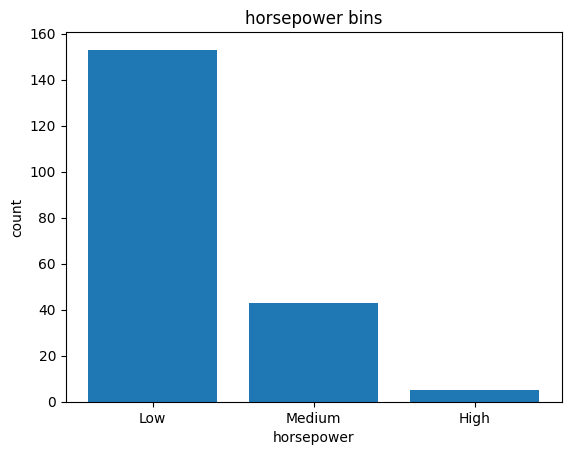

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Normally, you use a histogram to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower bins')

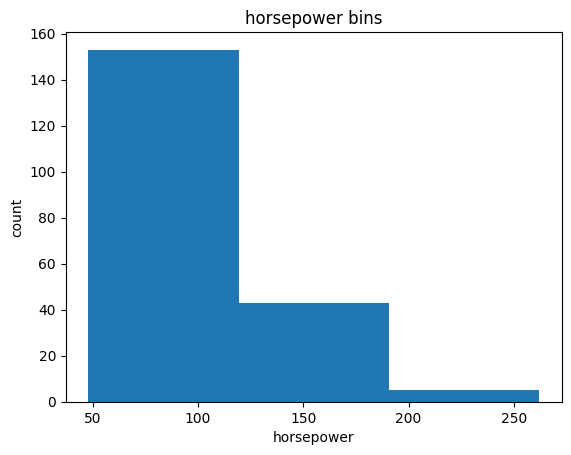

In [41]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower". 


<h3 id="Indicator_Variables">2.7 Indicator Variables</h3>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis.
</p>


In [42]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'horsepower-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [43]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Change the column names for clarity:


In [44]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.


In [45]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [46]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,False,True


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


#### Get the indicator variables for the aspiration feature.

In [47]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


#### merge the new dataframe to the original datafram



In [48]:
df = pd.concat([df, dummy_variable_2], axis=1)

#### drop original column "aspiration" from "df"

In [49]:
df.drop('aspiration', axis = 1, inplace=True)

In [50]:
df[["fuel-type-diesel", "fuel-type-gas","aspiration-std","aspiration-turbo"]] = df[["fuel-type-diesel", "fuel-type-gas","aspiration-std","aspiration-turbo"]].astype("int")

#### Show the cleaned Dataset

In [51]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


<h2 id="pattern_visualization">3. Analyzing Individual Feature Patterns Using Visualization</h2>


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h3 id="Continuous_Numerical_Variables">3.1 Continuous Numerical Variables</h3>


Scatterplot of "engine-size" and "price".


(0.0, 53370.383083470806)

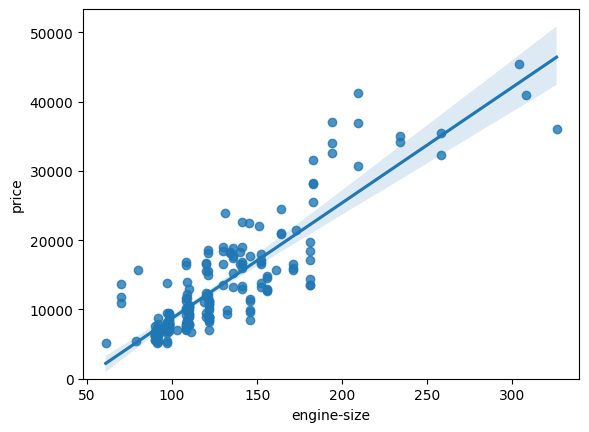

In [53]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


 We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [54]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Scatterplot of "highway-L/100km" and "price".


<Axes: xlabel='highway-L/100km', ylabel='price'>

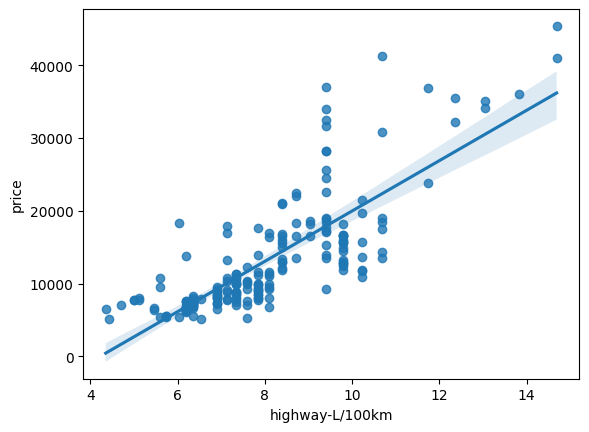

In [55]:
sns.regplot(x="highway-L/100km", y="price", data=df)

<p>As highway-L/100km goes up, the price goes up: this indicates a positive relationship between these two variables. highway-L/100km could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-L/100km' and 'price' and see it's approximately 0.80.


In [56]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


Let's see if "peak-rpm" is a predictor variable of "price".


<Axes: xlabel='peak-rpm', ylabel='price'>

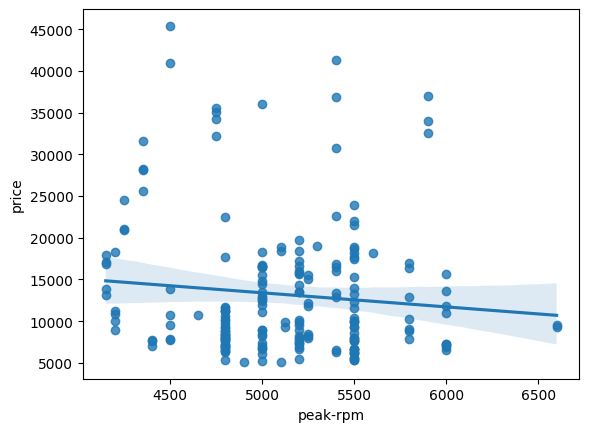

In [57]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [58]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Let's see if "stroke" is a predictor variable of "price".


<Axes: xlabel='stroke', ylabel='price'>

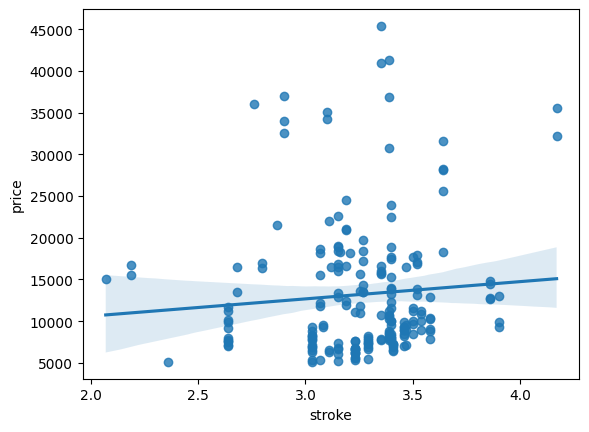

In [59]:
sns.regplot(x="stroke", y="price", data=df)

<p>Stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'stroke' and 'price' and see it's approximately 0.082.


In [60]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<h3 id="Categorical_Variables">3.2 Categorical Variables</h3>




Let's look at the relationship between "body-style" and "price".


<Axes: xlabel='body-style', ylabel='price'>

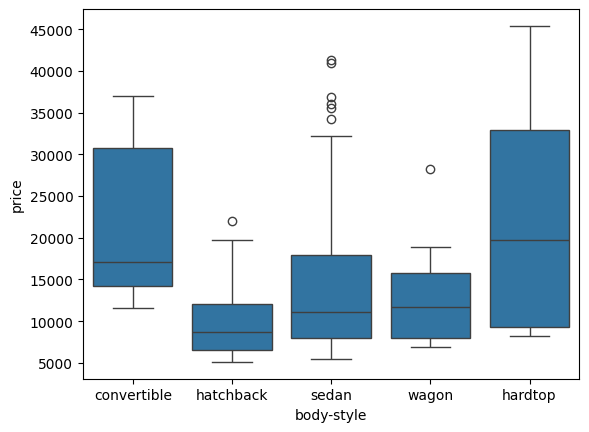

In [61]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

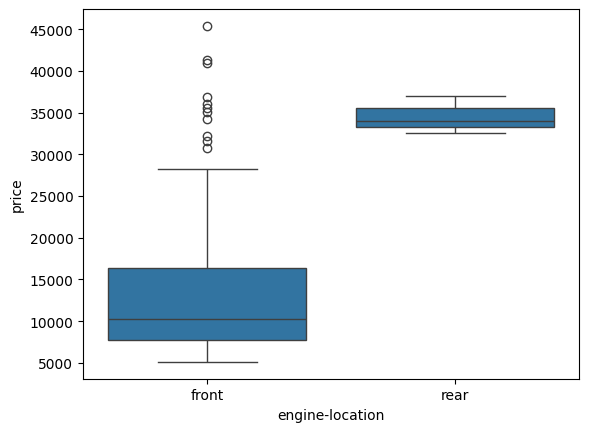

In [62]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


 Let's examine "drive-wheels" and "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

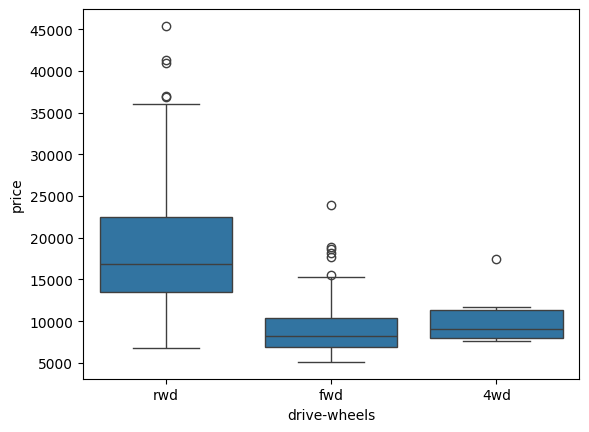

In [63]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">4. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,0.899108,0.040933,0.799331,0.869565,0.904682,0.928094,1.000000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,201.0,3.256874,0.316048,2.070000,3.110000,3.290000,3.410000,4.170000


In [65]:
df.describe(include=['object']).T

,count,unique,top,freq
make,201,22,toyota,32
num-of-doors,201,2,four,115
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
fuel-system,201,8,mpfi,92


<h3>Value Counts</h3>


In [66]:
drive_wheels_counts = df['drive-wheels'].value_counts().rename_axis('drive-wheels').reset_index(name='value_count')
drive_wheels_counts

,drive-wheels,value_count
0,fwd,118
1,rwd,75
2,4wd,8


In [67]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().rename_axis('engine-location').reset_index(name='value_count')
engine_loc_counts

,engine-location,value_count
0,front,198
1,rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="grouping">5. Grouping</h2>


In [68]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>


In [69]:
df_group_one = df[['drive-wheels','price']]


We can then calculate the average price for each of the different categories of data.


In [70]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'.


In [71]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table.


In [72]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style',values='price')
grouped_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


<p>We don't have data for some of the pivot cells. We can fill these missing cells with the value 0.</p>


In [73]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


Text(0, 0.5, 'price')

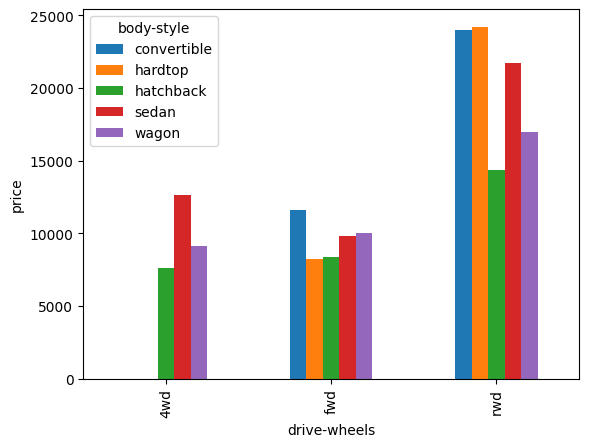

In [74]:
grouped_pivot.plot(kind="bar")
plt.ylabel('price')

<p><b>RWD (Rear-Wheel Drive):</b> Cars with rear-wheel drive tend to have the highest prices across most body styles, particularly for convertibles and hardtops.</p>
<p><b>FWD (Front-Wheel Drive):</b> Cars with front-wheel drive show a more moderate price range across all body styles, with prices generally lower than RWD cars.</p>
<p><b>4WD (Four-Wheel Drive):</b> This configuration has the fewest body styles represented and tends to be in the lower to mid-price range, with sedans being the most expensive in this category.</p>
<p>Overall, the graph shows that drive-wheel configuration and body style both play significant roles in the pricing of cars, with RWD cars generally being the most expensive across body styles.</p>

Let's use a heat map to visualize the relationship between Body Style vs Price.


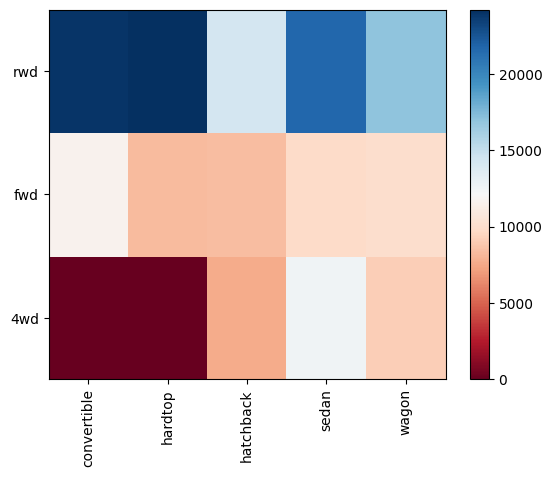

In [75]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>The main question we want to answer is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation">6. Correlation</h2>


In [76]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-L/100km          float64
highway-L/100km       float64
price                 float64
horsepower-binned    category
fuel-type-diesel        int64
fuel-type-gas           int64
aspiration-std          int64
aspiration-turbo        int64
dtype: object

In [77]:
numerical_features=df.select_dtypes(include=['float64','int64']).columns

In [78]:
corr=df[numerical_features].corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


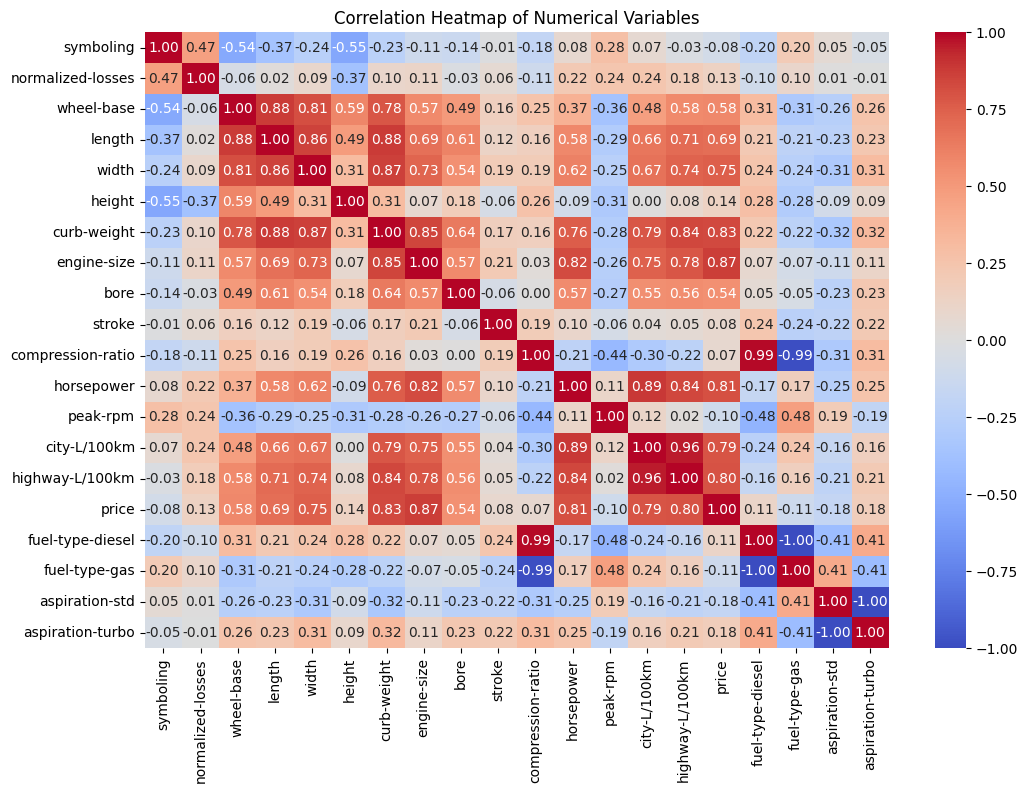

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [80]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [81]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [82]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650351e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [83]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [84]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-Weight vs. Price


 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [85]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [86]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [87]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.543).</p>


 We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [88]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7898975136626943  with a P-value of P =  3.9031064009394357e-44


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-L/100km and price is statistically significant, and the coefficient of about 0.789 shows that the relationship is strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [89]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P =  3.0467845810414008e-46


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about 0.801 shows that the relationship is quite strong.


<h2 id="Conclusionf">7. Conclusion: Important Variables</h2>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-L/100km</li>
    <li>Highway-L/100km</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


Some questions we want to ask in this module
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


In [90]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df4 = pd.read_csv(filepath, header=0)

In [91]:
df4.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="Regression">8. Regression Models</h2>


<h3 id="mlr">8.1 Multiple Linear Regression</h3>


In [92]:
from sklearn.linear_model import LinearRegression

Let's develop a model using these variables as the predictor variables.

In [104]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'wheel-base','bore','length','width','city-L/100km','highway-L/100km']]
Y=df['price']

Fit the linear model using the four above-mentioned variables.


In [105]:
lr=LinearRegression()
lr.fit(X, Y)

LinearRegression()

First, let's make a prediction:


In [146]:
Y_predict_multifit = lr.predict(X)
Y_predict_multifit 

array([12453.66775568, 12453.66775568, 19330.75405035, 11268.50797144,
       16494.42690272, 15851.51416089, 19184.66264063, 19454.77759408,
       19714.72150758, 10534.61587652, 10534.61587652, 17901.45775574,
       18036.51523246, 19027.14995727, 26841.01820743, 27404.23584801,
       30226.85001896,  -535.97285695,  5370.00701125,  5209.07515041,
        5250.31907264,  6222.50884702,  9358.5631097 ,  6445.96758123,
        6499.99057192,  6499.99057192,  9513.26531031, 12091.21601706,
       18372.94086077,  4574.23461871,  6782.07593385,  4697.02276058,
        7218.52446373,  7257.8139115 ,  6594.42097981,  7094.67203442,
        9940.35797362, 10070.50426937,  9434.80968873,  7972.32920005,
       10310.87889918, 11137.81831327,  7702.80220004, 11668.81394816,
       34756.60200129, 34756.60200129, 44141.37859758,  5401.83658513,
        6326.22803894,  6338.50599137,  5781.22720928,  5743.02033794,
        9877.92918693,  9877.92918693,  9890.20713936, 12840.25604228,
      

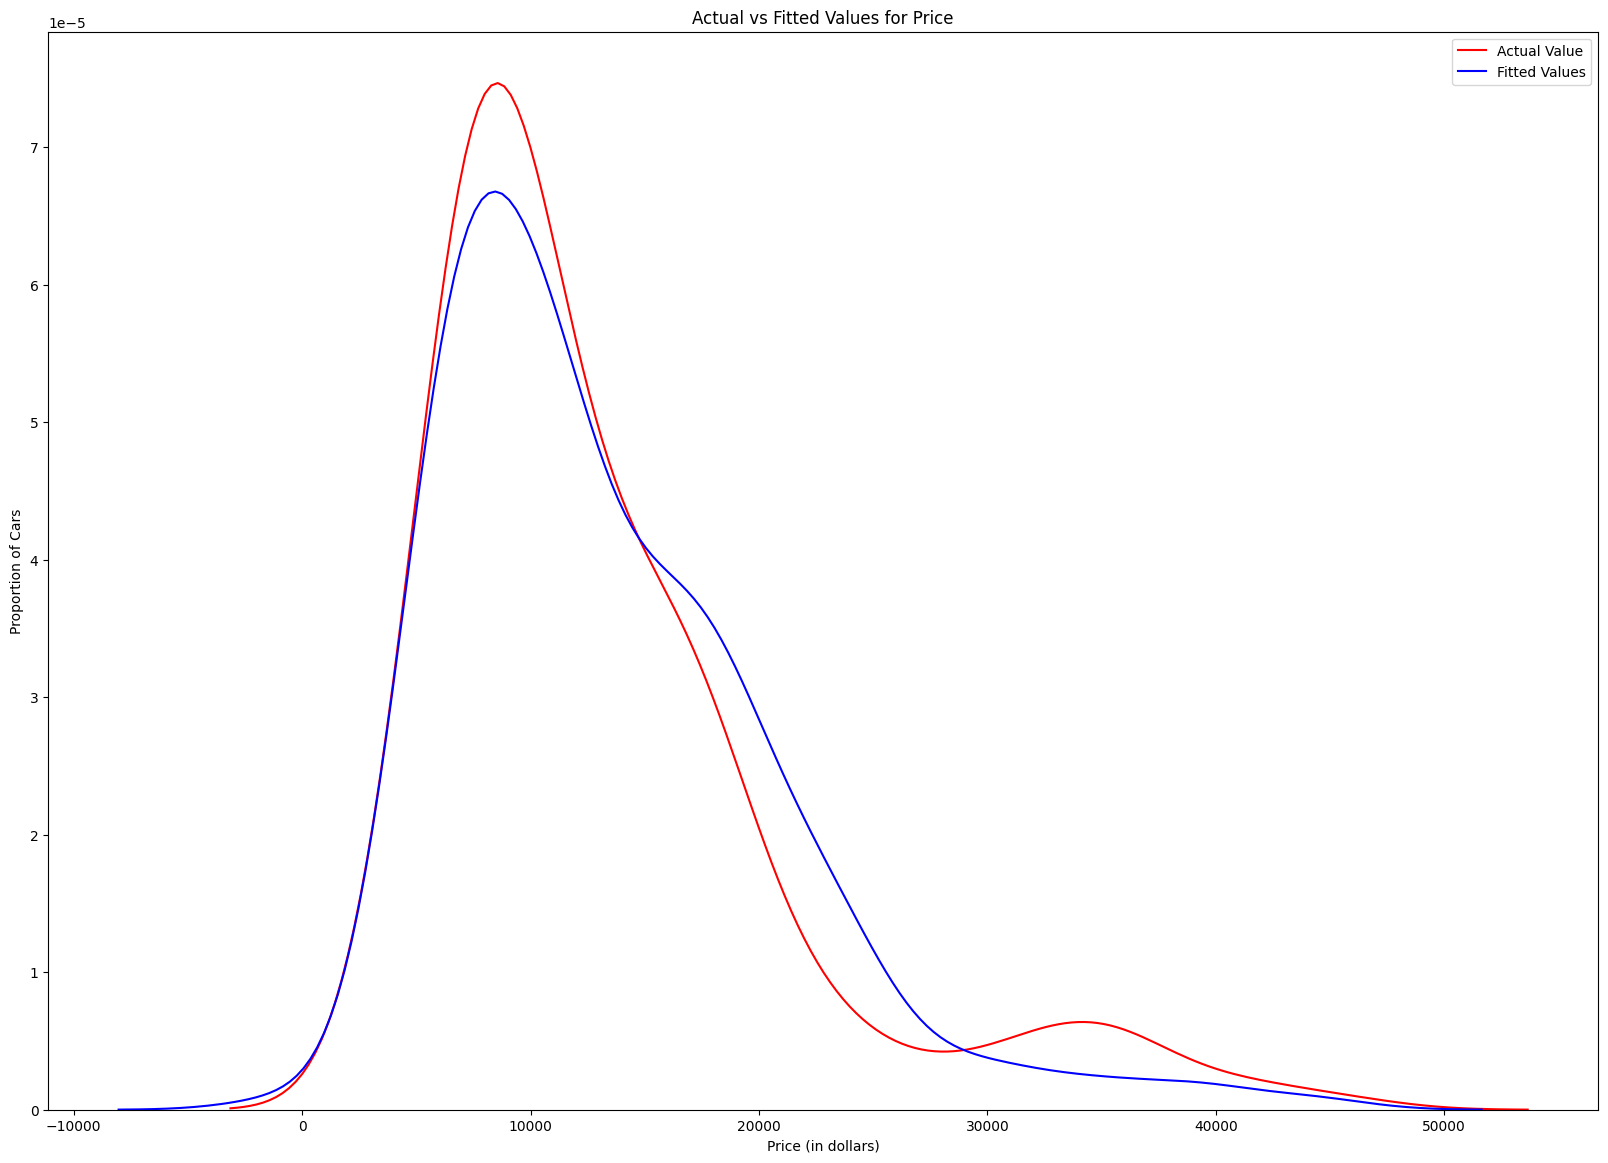

In [107]:
plt.figure(figsize=(20, 14))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h3 id="PolyRegg">8.2 Polynomial Regression Using Pipelines</h3>



In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [135]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [139]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type X to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [140]:
X = X.astype(float)
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [141]:
y_pred=pipe.predict(X)
y_pred[0:4]

array([12996.77260097, 12996.77260097, 15396.39524689, 10778.6656401 ])

<h3 id="Measures">8.3 Measures for In-Sample Evaluation</h3>


<p>we are going to use Two very important measures to determine the accuracy of models:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    

<h4>Model 1: Multiple Linear Regression</h4>



Let's calculate the R^2:


In [144]:
# fit the model 
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.824986406191319


We can say that ~82.5 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We compare the predicted results with the actual results:


In [147]:
from sklearn.metrics import mean_squared_error

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  10998143.911723329


<h4>Model 2: Polynomial Fit</h4>


Let's calculate the R^2.


Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


In [148]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [150]:
r_squared = r2_score(Y, y_pred)
print('The R-square value is: ', r_squared)

The R-square value is:  0.9480092422627411


We can say that ~94.8 % of the variation of price is explained by this polynomial fit.


<h5>MSE</h5>


We can also calculate the MSE:  


In [151]:
mean_squared_error(df['price'],y_pred)

3267185.2696139207

<h3 id="Decision">8.4 Decision Making: Determining a Good Model Fit</h3>



<h5>Let's take a look at the values for the different models.</h5>   
<p>Multiple Linear Regression.
<ul>
    <li>R-squared: 0.824986406191319</li>
    <li>MSE: 1.0998 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit.
<ul>
    <li>R-squared: 0.94800924</li>
    <li>MSE: 3.2671 x 10^6</li>
</ul>
</p>


<h4>Multiple Linear Regression (MLR) vs. Polynomial Fit</h4>


<ul>
    <li><b>MSE</b>: The MSE for the  is smaller than the MSE for the MLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is also much larger than for the MLR.</li>
</ul>


<h2 id="Conclusionff">9. Conclusion</h2>


<p>Comparing these two models, we conclude that <b>the Polynomial Fit model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have a lot of variables that has non linear correlation with out target variable, and we know that more than one of those variables are potential predictors of the final car price.</p>


## Author
Younes Benalia

<a href="https://www.linkedin.com/in/younesbenalia" target="_blank">LinkedIn</a>
<br>
<a href="https://github.com/younesBenalia" target="_blank">GitHub</a>
<br>
<a href="mailto:younes.benalia.dz@gmail.com" target="_blank">Contact</a>